# Семинар 5. Групповая обработка и слияние наборов данных в Pandas

На этом семинаре мы поработаем с данными о продажах глобального интернет-магазина, реализующего офисные товары и технику. Цель занятия - научиться использовать групповую обработку в Pandas и соединять таблицы данных.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузим данные:

In [ ]:
orders = pd.read_csv('../datasets/global_superstore/orders.zip', encoding='utf-8')
orders.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
row_id            51290 non-null int64
order_id          51290 non-null object
order_date        51290 non-null object
ship_date         51290 non-null object
ship_mode         51290 non-null object
customer_id       51290 non-null object
customer_name     51290 non-null object
segment           51290 non-null object
postal_code       9994 non-null float64
city              51290 non-null object
state             51290 non-null object
country           51290 non-null object
region            51290 non-null object
market            51290 non-null object
product_id        51290 non-null object
category          51290 non-null object
sub_category      51290 non-null object
product_name      51290 non-null object
sales             51290 non-null float64
quantity          51290 non-null int64
discount          51290 non-null float64
profit            51290 non-null float64
shipping_c

При загрузке со стандартными параметрами появилось несколько проблем:

- Столбец  почтового индекса (`postal_code`) распознано как числовой. Однако в некоторых странах почтовый индекс может содержать буквы и другие символы.

- Даты загрузились как текст

Добавим спецификацию форматов данных в команду для загрузки:

In [ ]:
orders = pd.read_csv('../datasets/global_superstore/orders.zip', encoding='utf-8',
                    parse_dates=['order_date', 'ship_date'],
                    dtype={'postal_code' : str})
orders.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
row_id            51290 non-null int64
order_id          51290 non-null object
order_date        51290 non-null datetime64[ns]
ship_date         51290 non-null datetime64[ns]
ship_mode         51290 non-null object
customer_id       51290 non-null object
customer_name     51290 non-null object
segment           51290 non-null object
postal_code       9994 non-null object
city              51290 non-null object
state             51290 non-null object
country           51290 non-null object
region            51290 non-null object
market            51290 non-null object
product_id        51290 non-null object
category          51290 non-null object
sub_category      51290 non-null object
product_name      51290 non-null object
sales             51290 non-null float64
quantity          51290 non-null int64
discount          51290 non-null float64
profit            51290 non-null flo

Теперь данные загрузились правильно. Даты стали датами, а `postal_code` теперь - текстовое поле. Количество пропущенных значений не изменилось, в данных действительно во многих случаях индекс не указан.

При загрузке из текстовых файлов может возникать множество проблем из-за ошибок в данных или несоответствия форматов. При необходимости обратитесь к ресурсам:  

- справка Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- Раздел 6.1 в книге Уэса Маккинни Python и анализ данных (см. ресурсы в LMS)

**Словарь данных:**

 - `row_id` - код строки заказа (уникальный)  
 - `order_id` - код заказа
 - `order_date` - дата размещения заказа
 - `ship_date` - дата отгрузки заказа (пусто, если еще не отгружен)
 - `ship_mode` - класс отправки
 - `customer_id` - код клиента
 - `customer_name` - имя клиента
 - `segment` - рыночный сегмент клиента
 - `postal_code` - почтовый индекс получателя
 - `city` - город получателя
 - `state` - штат получателя
 - `country` - страна получателя
 - `region` - регион получателя
 - `market` - рынок, к которому относится получатель
 - `product_id` - код товара
 - `category` - товарная категория
 - `sub_category` - товарная подкатегория
 - `product_name` - наименование товара
 - `sales` - выручка
 - `quantity` - количество единиц товара
 - `discount` - скидка
 - `profit` - валовая прибыль 
 - `shipping_cost` - затраты на доставку
 - `order_priority` - приоритет заказа
 

Данные представляют собой строки заказов, выполненных компанией. Каждая строка имеет уникальный номер `row_id` и содержит данные о том, кто, что и когда заказал, когда эта позиция была отправлена, адрес получателя. Также количество единиц, выручку, прибыль и затраты на доставку по строке. 

В одном заказе может быть несколько позиций. В этом случае в таблице будет несколько строк с одинаковым номером заказа:

In [ ]:
orders.query('order_id == "AE-2015-GH4665138-42351"')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
27486,43926,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,TEC-PH-5253,Technology,Phones,"Motorola Headset, VoIP",95.796,4,0.7,-156.564,6.73,Medium
29298,43924,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-ST-4078,Office Supplies,Storage,"Eldon Lockers, Blue",59.373,1,0.7,-118.767,5.83,Medium
33521,43922,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-AR-3463,Office Supplies,Art,"BIC Pencil Sharpener, Water Color",77.256,8,0.7,-82.584,4.08,Medium
40033,43925,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-ST-5693,Office Supplies,Storage,"Rogers File Cart, Single Width",42.489,1,0.7,-62.331,2.24,Medium
49469,43923,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-BI-3246,Office Supplies,Binders,"Avery Binder Covers, Clear",3.159,1,0.7,-4.971,1.25,Medium
49470,43927,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-BI-3249,Office Supplies,Binders,"Avery Binder Covers, Recycled",3.429,1,0.7,-3.891,1.25,Medium


## Задание 1

Во всех заданиях необходимо округлить результат до разумного количества десятичных знаков. Крупные суммы выводите в подходящих единицах (тысячи или млн долларов)

### 1.1. Сколько составляет оборот по каждой товарной категории? 
(выведите ответ в млн долларов с округлением до 1 десятичного знака).

In [ ]:
orders_groupby = orders.groupby('category')
orders_groupby
pd.DataFrame(round(orders_groupby['sales'].sum(), 1))

,sales
category,
Furniture,4110451.9
Office Supplies,3787492.5
Technology,4744557.5


### 1.2. Сколько товаров представлено в каждой товарной категории? 
(попробуйте реализовать двумя способами: только с помощью группировки/определения размера группы, и через агрегирующую функцию `nunique()` - число уникальных значений.

In [ ]:
pd.DataFrame(orders_groupby.apply(len))

,0
category,
Furniture,9860
Office Supplies,31289
Technology,10141


In [ ]:
pd.DataFrame(orders_groupby['row_id'].nunique())

,row_id
category,
Furniture,9860
Office Supplies,31289
Technology,10141


In [ ]:
orders_groupby.nunique()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
category,,,,,,,,,,,,,,,,,,,,,
Furniture,9860,8222,1332,1435,4,7069,795,3,449,2342,...,841,1,4,841,7057,14,21,7637,6918,4
Office Supplies,31289,19464,1413,1464,4,14266,796,3,580,3357,...,2071,1,9,2071,14137,14,13,14979,8735,4
Technology,10141,8428,1338,1433,4,7336,796,3,418,2400,...,876,1,4,876,7021,14,21,7506,7126,4


### 1.3. Составьте рейтинг стран на основе прибыли от продаж.

In [ ]:
orders_profit = orders.groupby('country')['profit'].sum().reset_index()
orders_profit.sort_values('profit', ascending = False)

,country,profit
156,United States,286397.02170
30,China,150683.08500
66,India,129050.59500
155,United Kingdom,111900.15000
50,France,109029.00300
54,Germany,107190.32550
6,Australia,103907.43300
94,Mexico,102453.58552
134,Spain,54390.12000
44,El Salvador,42023.24320


### 1.4. Выведите 3 самых популярных (по количеству заказов) товара на каждом рынке.

In [ ]:
orders.groupby('market')[['order_id']].count().nlargest(3, 'order_id').reset_index()

,market,order_id
0,Asia Pacific,14302
1,Europe,11729
2,USCA,10378


### 1.5. Сравните рынки по характеристикам заказов на них:
- Средний и медианный чек (сумма заказа)
- Среднее и медианное количество позиций в заказе
- Средняя и медианная прибыль по заказу
- Средняя и медианная стоимость доставки по заказу
- Среднее и медианное отношение стоимости доставки заказа к его сумме

Обратите внимание, что анализировать нужно именно характеристики заказов. В таблице содержатся _строки_ заказов, сначала на их основе нужно посчитать характеристики заказов.

In [ ]:
orders['ref'] = (orders['shipping_cost'] / orders['sales'])
orders.groupby('market')[['profit', 'quantity',
                          'sales','shipping_cost',
                          'ref' ]].agg(['mean',
                                        'median']).reset_index()

market     profit            quantity              sales            \
                      mean    median      mean median        mean    median   
0        Africa  19.374674   7.56000  2.303030      1  170.868370   52.4400   
1  Asia Pacific  28.190186   7.49400  3.397916      3  282.663842   99.4977   
2        Europe  38.328223  14.13000  3.573962      3  280.274212  111.1200   
3         LATAM  21.531328   8.00000  3.742568      3  210.278334   80.3560   
4          USCA  29.313395   8.77225  3.729620      3  227.801988   54.9000   

  shipping_cost              ref            
           mean median      mean    median  
0     19.367663   5.15  0.133487  0.106000  
1     30.615170   9.15  0.118333  0.097225  
2     29.747211  10.56  0.113568  0.094348  
3     22.831321   7.47  0.117917  0.096896  
4     23.844423   5.14  0.140397  0.108236

### 1.6. Рейтинг по относительной доле затрат на доставку
Рассчитайте для каждой строки (позиции) заказа долю затрат на доставку к выручке по этой строке. Для каждого рынка составьте рейтинг из 5 самых дорогих по стоимости доставке позиций. Чтобы их найти, посчитайте для каждой строки отличие доли затрат на доставку этой позиции к средней доле затрат на доставку для этого региона, товарной категории и класса доставки.

**Подсказка:** для подсчета отличий по группам используйте `transform()`.

In [ ]:
orders['averageship'] = orders.groupby('order_id')['shipping_cost'].transform('mean')
orders['deltatship'] = orders.groupby('order_id')['shipping_cost'].transform(lambda x: x - x.mean())
orders.groupby('market')[['ship_mode', 'deltatship']].apply(lambda x: x.nlargest(5, 'deltatship'))

ship_mode  deltatship
market                                        
Africa       19       Second Class  567.787500
             86           Same Day  449.678333
             81       Second Class  423.977500
             234       First Class  258.126667
             396          Same Day  248.335714
Asia Pacific 2         First Class  716.218000
             5        Second Class  668.140000
             12       Second Class  668.070000
             1        Second Class  663.355000
             22        First Class  585.692857
Europe       63        First Class  474.541111
             44        First Class  469.074000
             92           Same Day  426.765000
             80     Standard Class  415.205000
             43     Standard Class  403.993333
LATAM        30       Second Class  524.115400
             68           Same Day  454.393833
             13           Same Day  401.114000
             129          Same Day  393.318571
             103       First Class  359.200400
USCA         23376    Second Class  674.954000
             26103  Standard Class  569.420000
             14598        Same Day  534.517143
             49493    Second Class  521.485000
             44656        Same Day  503.906667

### 1.7. Сравните динамику продаж по годам различных товарных подкатегорий категории `Technology`.

Попробуйте два способа: через `pivot_table()` и через `unstack()`.

**Подсказка**: компоненты даты - например, год, месяц можно получить на основе столбца с датами с помощью атрибутов `dt.year`, `dt.month`, `dt.day`:

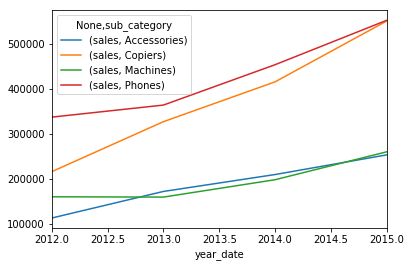

In [ ]:
orders['year_date'] = orders['order_date'].dt.year
orders_Technology = orders_groupby.get_group('Technology')
orders_Technology.groupby(['year_date', 'sub_category'])[['sales']].sum().round(1).unstack().plot()

In [ ]:
orders_Technology.pivot_table(['sales'], index = 'sub_category', columns = 'year_date', aggfunc=('sum'))

sales                                         
year_date             2012         2013          2014          2015
sub_category                                                       
Accessories   113456.00760  172397.6850  209895.16230  253488.16360
Copiers       216367.89214  327168.5988  415514.88858  550384.89376
Machines      160545.68140  159858.9511  198376.19870  260279.23590
Phones        337282.48020  364016.2744  453519.00450  552006.38010

In [ ]:
orders.head(5)['order_date'].dt.month

0    11
1     2
2    10
3     1
4    11
Name: order_date, dtype: int64

In [ ]:
orders.head(5)['order_date'].dt.day

0    11
1     5
2    17
3    28
4     5
Name: order_date, dtype: int64

### 1.8. Сравните динамику продаж по годам товаров брендов Apple и Samsung

In [ ]:
orders['Sam'] = np.where(orders['product_name'].str.contains('Samsung'), 'Samsung', 'o')
orders['Appl'] = np.where(orders['product_name'].str.contains('Apple'), 'Apple','o')
orders_L = orders.query("Sam == 'Samsung' or Appl == 'Apple'") [['product_name','sales','year_date']]
orders_L.pivot_table(['sales'], index = 'product_name', columns = 'year_date', aggfunc=('sum')).round(1)

sales                    \
year_date                                              2012     2013     2014   
product_name                                                                    
Apple Audio Dock, Cordless                            492.2   1188.2   1519.2   
Apple Audio Dock, Full Size                           874.5   2281.6   1793.9   
Apple Audio Dock, VoIP                               3276.1   1001.9   1761.6   
Apple Audio Dock, with Caller ID                     1653.9   1093.1   5415.0   
Apple EarPods with Remote and Mic                       NaN     84.0    112.0   
Apple Headset, Cordless                              1326.9    875.3   2351.8   
Apple Headset, Full Size                              272.9    682.9   2113.5   
Apple Headset, VoIP                                   293.4   1926.7    898.3   
Apple Headset, with Caller ID                        1230.8   2234.4    893.8   
Apple Office Telephone, Cordless                     1087.8   1240.0   1514.8   
Apple Office Telephone, Full Size                     660.8   1307.0    616.4   
Apple Office Telephone, VoIP                         1002.3   1407.6    943.5   
Apple Office Telephone, with Caller ID                443.7    364.5   1479.2   
Apple Signal Booster, Cordless                         41.9   2322.7   2229.7   
Apple Signal Booster, Full Size                      2414.0   1618.5   2322.0   
Apple Signal Booster, VoIP                           1761.7    492.3   1690.1   
Apple Signal Booster, with Caller ID                 3259.1   3967.4   1771.0   
Apple Smart Phone, Cordless                          2545.2   2227.0   4740.4   
Apple Smart Phone, Full Size                        14986.2  19541.9  21120.4   
Apple Smart Phone, with Caller ID                    2300.6   5027.3   6518.4   
Apple Speaker Phone, Cordless                        1745.1   1116.4   2391.8   
Apple Speaker Phone, Full Size                        793.2    623.0    745.5   
Apple Speaker Phone, VoIP                            1347.0   1715.1   3779.8   
Apple Speaker Phone, with Caller ID                  1557.3    912.4   1837.2   
Apple iPhone 5                                       5328.6      NaN   5198.6   
Apple iPhone 5C                                       699.9    400.0    240.0   
Apple iPhone 5S                                      3647.9      NaN      NaN   
Cush Cases Heavy Duty Rugged Cover Case for Sam...      NaN     39.6      NaN   
LF Elite 3D Dazzle Designer Hard Case Cover, Lf...     43.6      NaN    141.7   
OtterBox Commuter Series Case - Samsung Galaxy S4      80.0    264.9      NaN   
...                                                     ...      ...      ...   
Samsung Galaxy S4                                    1502.4    626.0   1001.6   
Samsung Galaxy S4 Active                             3499.9    500.0      NaN   
Samsung Galaxy S4 Mini                                  NaN   1880.0   1128.0   
Samsung HM1900 Bluetooth Headset                       52.7    122.9    175.6   
Samsung Headset, Cordless                             775.7   1206.7    692.1   
Samsung Headset, Full Size                              NaN    886.4    268.2   
Samsung Headset, VoIP                                 382.3   1129.9   1139.7   
Samsung Headset, with Caller ID                       424.6    995.5   1443.7   
Samsung Office Telephone, Cordless                   1232.1    265.5    340.4   
Samsung Office Telephone, Full Size                  1055.3   2070.2    665.1   
Samsung Office Telephone, VoIP                        818.6    653.1    217.7   
Samsung Office Telephone, with Caller ID              319.6    994.6   1141.4   
Samsung Replacement EH64AVFWE Premium Headset           NaN      NaN     60.5   
Samsung Rugby III                                      52.8    976.7    198.0   
Samsung Signal Booster, Cordless                      548.5   2499.2   2928.2   
Samsung Signal Booster, Full Size                     413.6   1704.2   2275.0   
Sams